<a href="https://colab.research.google.com/github/Sikandarh11/Machine-Learning-Projects/blob/main/ANN(heart_disease_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d rishidamarla/heart-disease-prediction

Dataset URL: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
License(s): CC0-1.0
  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 8.01MB/s]


In [3]:
import zipfile
zip_data = zipfile.ZipFile('/content/heart-disease-prediction.zip')
zip_data.extractall('\content')
zip_data.close()

In [38]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/\content/Heart_Disease_Prediction.csv')

In [5]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Heart Disease'] = encoder.fit_transform(df['Heart Disease'])

In [40]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdf = scaler.fit_transform(df.drop('Heart Disease', axis=1))

In [42]:
newdf.shape

(270, 13)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Heart Disease'], axis=1), df['Heart Disease'], test_size = 0.2,random_state=1)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

In [13]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [93]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode='auto',
    baseline = None,
    restore_best_weights = None
)

In [128]:
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(16, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(16, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(8, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dense(1, activation = 'sigmoid'))

In [129]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 32)                448       
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 16)                528       
                                                                 
 dropout_34 (Dropout)        (None, 16)                0         
                                                                 
 dense_57 (Dense)            (None, 16)                272       
                                                                 
 dropout_35 (Dropout)        (None, 16)                0         
                                                                 
 dense_58 (Dense)            (None, 8)               

In [130]:
adam = Adam(learning_rate =0.01)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [131]:
history = model.fit(newdf , df['Heart Disease'], epochs=500, validation_split = 0.2, verbose=0, callbacks = callback)

Epoch 27: early stopping


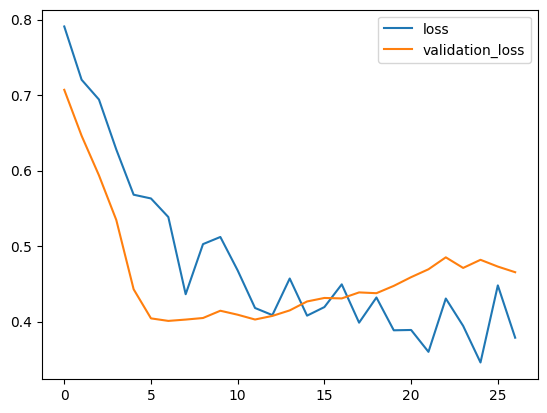

In [132]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

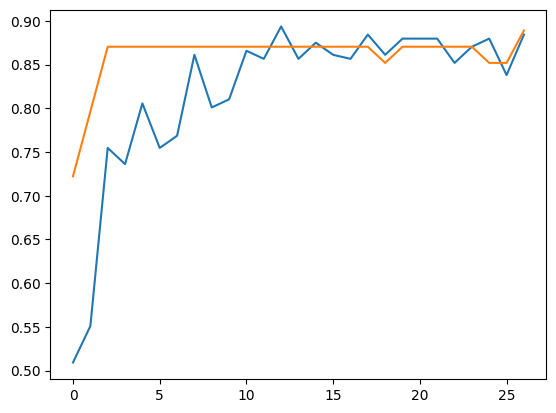

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()